In [62]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd

In [63]:
def logistic_model(t, K, N0, R):
    return  (K / (1 + ((K-N0)/N0)*np.exp(-R*t)))

def logistic_model1(t, K, R):
    return  (K / (1 + ((K-3)/3)*np.exp(-R*t)))

In [64]:
def adjusted_r2(r2, n, p):
    """
    Adjusts an r-squared value to remove bias from increased fit when parameters are added.
    r2: r squared
    n: number of data points
    p: number of parameters
    """
    return 1 - (1-r2)*(n-1)/(n-p-1)

In [65]:
def get_data(place_name):
    """
    Reads a csv file containing 2 columns, date and cases.
    Adds a new column, days
    Returns a dataframe
    """
    filename = place_name + '.csv'
    df = pd.read_csv(filename, index_col=0)
    df['days'] = range(0, df.size)
    return df
#get_data('Guam')

## Unconstrained logistic model

Parameter estimates (K, N0, R): [141.90738437   6.95844239   0.20081106]
Adjusted r-squared (a measure of goodness of fit): 0.9914764351501759


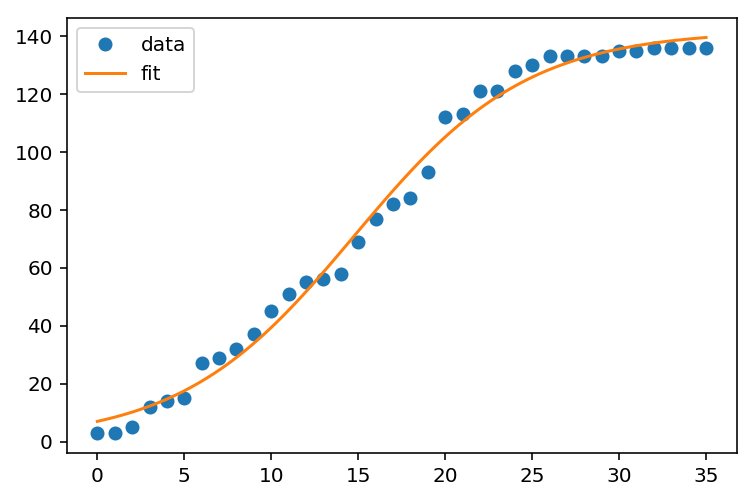

In [66]:
df = get_data('Guam')

initial_values = [1000, 3, 0.2] # parameter value guesses to initialize curve fitting
popt, pcov = curve_fit(logistic_model, df.days, df.cases, initial_values)
print('Parameter estimates (K, N0, R): {}'.format(popt))

# Calculate adjusted r-squared for fitted model
targets = df.cases.values
predictions = [logistic_model(day, *tuple(popt)) for day in df.days]
r2 = r2_score(targets, predictions)
r2 = adjusted_r2(r2, df.shape[0], len(initial_values))
print('Adjusted r-squared (a measure of goodness of fit): {}'.format(r2))

# plot
x = np.linspace(0, df.days.max(), 100)
y = logistic_model(x, *popt)
pylab.plot(df.days, df.cases, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.legend(loc='best')
pylab.show()

## Logistic model with N<sub>0</sub> fixed at 3

Parameter estimates (K, N0, R): [136.37108253   0.25988726]
Adjusted r-squared (a measure of goodness of fit): 0.9811150598651197


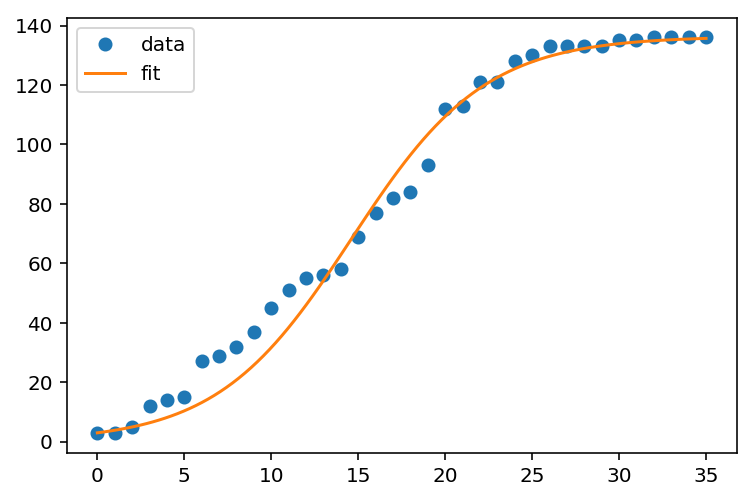

In [67]:
initial_values = [1000, 0.2] # parameter value guesses to initialize curve fitting
popt, pcov = curve_fit(logistic_model1, df.days, df.cases, initial_values)
print('Parameter estimates (K, N0, R): {}'.format(popt))

# Calculate adjusted r-squared for fitted model
targets = df.cases.values
predictions = [logistic_model1(day, *tuple(popt)) for day in df.days]
r2 = r2_score(targets, predictions)
r2 = adjusted_r2(r2, df.shape[0], len(initial_values))
print('Adjusted r-squared (a measure of goodness of fit): {}'.format(r2))

# plot
x = np.linspace(0, df.days.max(), 100)
y = logistic_model1(x, *popt)

pylab.plot(df.days, df.cases, 'o', label='data')
pylab.plot(x,y, label='fit')
#pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()